<a href="https://colab.research.google.com/github/693080593/research/blob/master/Extract_HHV_Stratified_Test_Set_Multisplit_050121_%5B3%5D_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Extrantant Type Effect on Biocrude Yield HHV ER 050121 Stratified Test MaxMinScale HHV.csv')
Original_Oil_HHV = data['Bio-crude Oil HHV']
Original_Features = data.drop(['Bio-crude Oil Yield','Bio-crude Oil HHV','Bio-crude Oil ER'], axis = 1)

data_figure = data.drop(['Bio-crude Oil Yield','Bio-crude Oil ER','Group'], axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data_figure.shape))
data_figure.shape

data_figure[:517:11]


Bio-crude dataset has 316 data points with 17 variables each.


,Dichloromethane,Toluene,Acetone,Tetrahydrofuran,Methanol,Hexane,Diethyl Ether,Chloroform,Ethyl Acetate,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,100,0,0,0,0,0,0,0,0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.644424
11,100,0,0,0,0,0,0,0,0,41.000000,35.000000,0.000000,0.000000,12.000000,0.000000,6.521739,94.274547
22,0,0,100,0,0,0,0,0,0,17.830000,30.060000,0.000000,0.000000,54.170000,0.000000,2.100000,67.978361
33,100,0,0,0,0,0,0,0,0,21.760000,14.260000,0.000000,0.000000,56.970000,0.000000,7.000000,68.918971
44,100,0,0,0,0,0,0,0,0,13.000000,56.000000,6.000000,15.000000,4.000000,0.000000,6.000000,72.599619
55,0,0,0,0,0,0,0,100,0,2.300000,61.800000,0.000000,0.000000,26.700000,0.000000,8.700000,65.647284
66,0,0,100,0,0,0,0,0,0,13.880000,46.940000,0.000000,0.000000,28.000000,0.000000,3.470000,59.103909
77,100,0,0,0,0,0,0,0,0,13.900000,54.500000,0.000000,0.000000,10.000000,0.000000,7.500000,74.644424
88,100,0,0,0,0,0,0,0,0,4.325300,25.576050,0.000000,0.000000,43.678850,0.000000,16.500000,74.317255
99,100,0,0,0,0,0,0,0,0,6.200000,67.440000,0.000000,0.000000,15.280000,0.000000,11.080000,83.968732


In [ ]:
# MinMaxScale
#from sklearn.preprocessing import MinMaxScaler
#from pandas import DataFrame

#data_MinMax = data2.drop(['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash','Bio-crude Oil Yield','Group'], axis = 1)

#scaler = MinMaxScaler()

#print(scaler.fit(data_MinMax))

#print(scaler.data_max_)
#print(scaler.data_min_)

#data_MinMax3 = scaler.transform(data_MinMax)

#data_MinMax2 = pd.DataFrame(data = data_MinMax3*100,  columns =["Temperature"])

#print(data_MinMax2)

#Original_Features = pd.concat([data2['Lipid'],data2['Protein'],data2['Cellulose'],data2['Hemicellulose'],data2['Carbohydrate'],data2['Lignin'],data2['Ash'],data_MinMax2, data2['Group']], axis=1)

#data=pd.concat([Original_Features, data2['Bio-crude Oil Yield']], axis=1)

#data_figure_new=data.drop('Group', axis = 1)

#data[:517:11]

#Original_Features[:511:11]

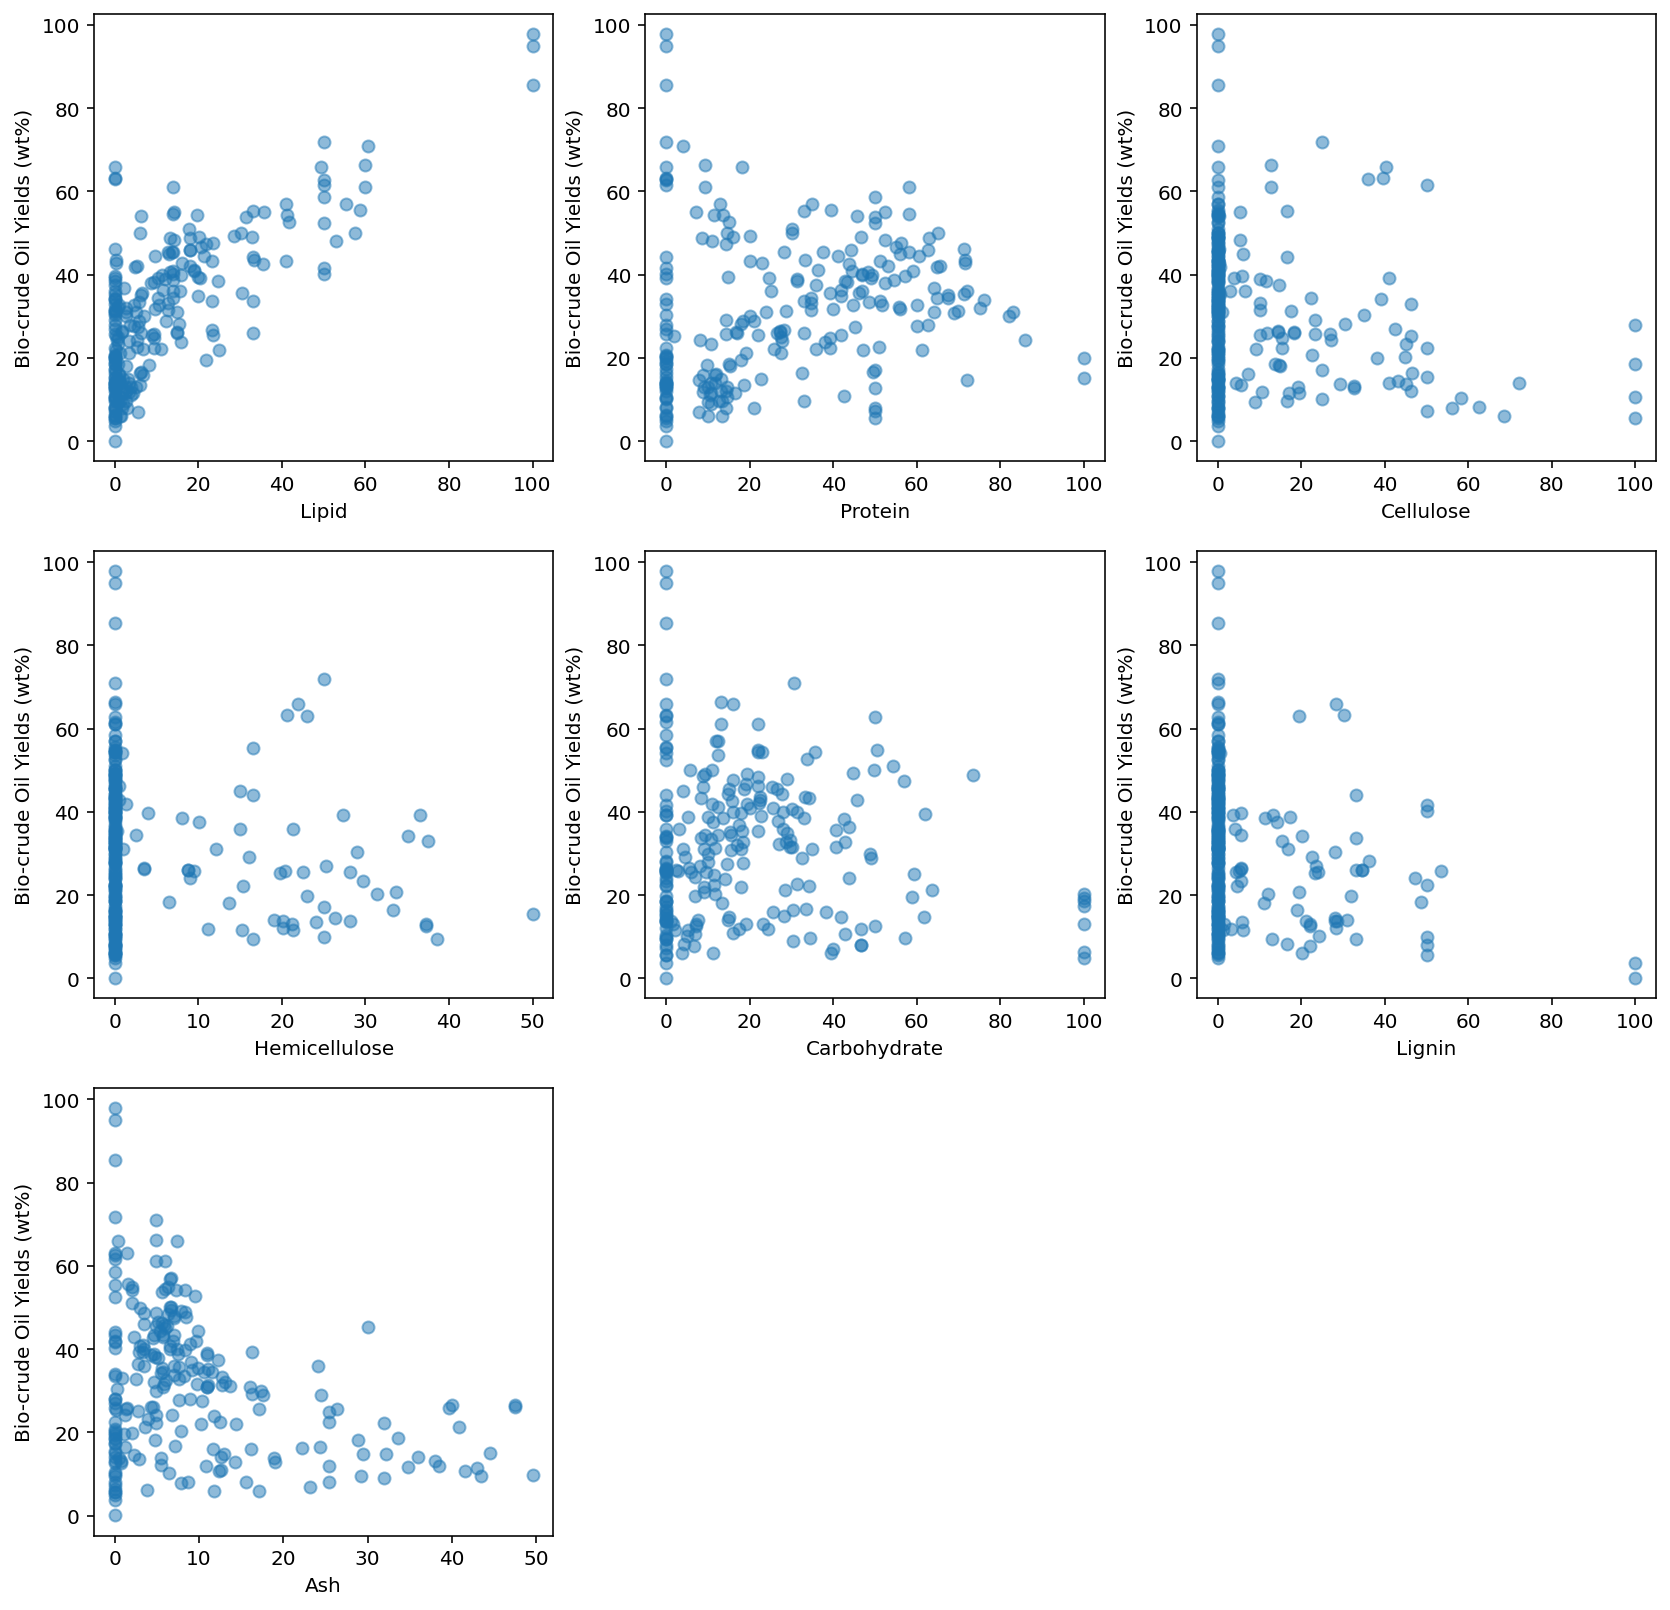

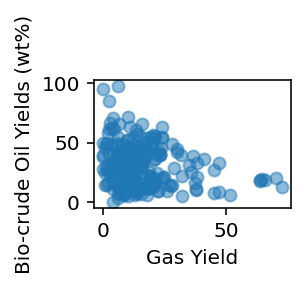

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(14,14))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(337)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

plt.subplot(338)
plt.xlabel('Gas Yield')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Gas Yield'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

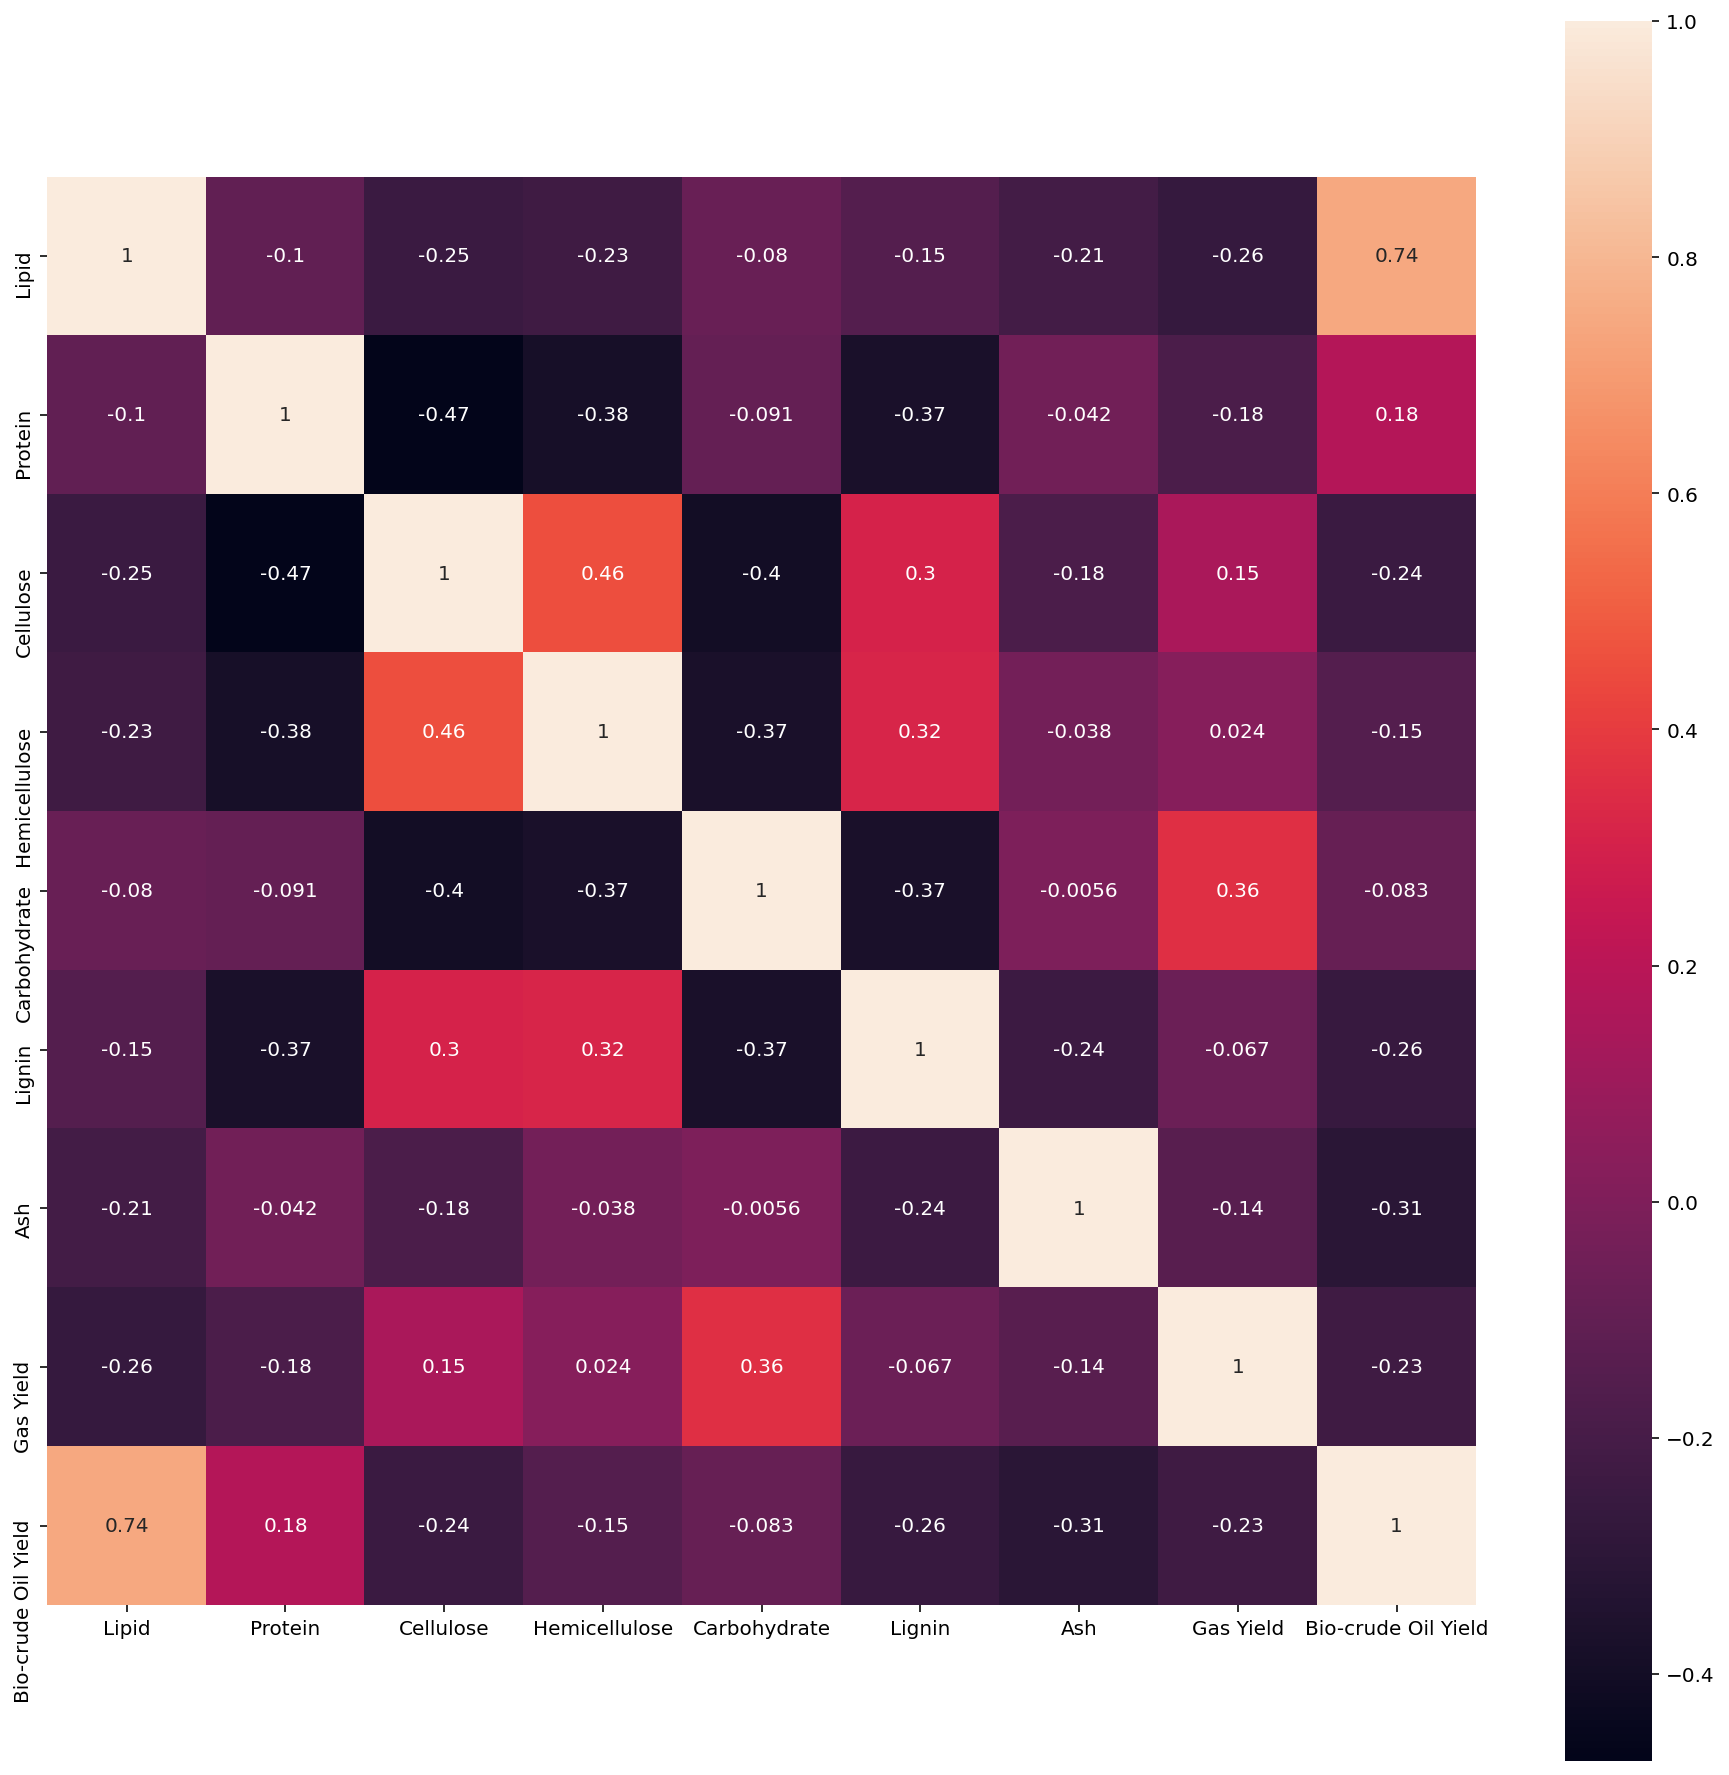

In [ ]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(16,16))
sns.heatmap(data_figure.corr(),vmax=1,square=True,annot=True)
plt.show()

In [11]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use.
for i in range(0,201,1):
  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'Stratified KFold'
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=i)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  df = pd.concat([Features, Oil_Yields], axis=1)
  
  # Lets split the data into 10 folds. 
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=26)
  
  group = df.loc[:,'Group']
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  MRE_train_all=[]
  MRE_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in skf.split(df, group):
    
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    
    X_train=train.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_train=train['Bio-crude Oil Yield']
    
    X_test=test.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_test=test['Bio-crude Oil Yield']

    model = RandomForestRegressor()

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    
  # Predict validation set
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  MRE_valid = performance_metric(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Difference Values of R2 of training and test sets", np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Values of R2 of test set", r2_test_all)
  print("Difference Values of R2 Max and Min of test set", max(r2_test_all)-min(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print("")
  #print("Mean value of MRE of training set", np.mean(MRE_train_all))
  #print("Mean value of MRE of test set", np.mean(MRE_test_all))
  #print("Difference Values of MRE of training and test sets", np.mean(MRE_train_all)-np.mean(MRE_test_all))
  #print("Values of MRE of test set", MRE_test_all)
  #print("Difference Values of MRE Max and Min of test set", max(MRE_test_all)-min(MRE_test_all))
  #print("Optimal model has MRE of valid set:", MRE_valid)

In [ ]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)
    
  model = RandomForestRegressor(random_state=33)
  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_HHV)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Text(0.5, 1.0, 'y_pred vs. y_true')

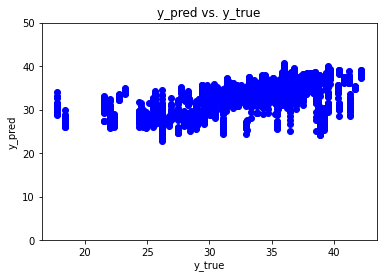

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 50)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

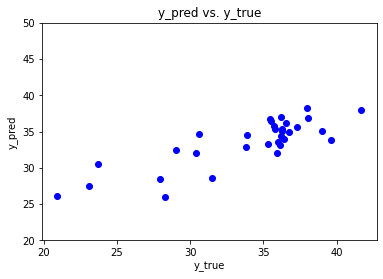

In [ ]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(20, 50)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 200, 11)

for j in range(10, 200, 10):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':j,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_HHV)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_depth 参数的最佳取值(1, 20, 1)

for j in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':190,'max_depth':j,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_HHV)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_leaf 参数的最佳取值(1, 3, 1)

for j in range(1, 3, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':190,'max_depth':12,'min_samples_leaf':j,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_HHV)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_split 参数的最佳取值(2, 5, 20)

for j in range(2, 5, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':190,'max_depth':12,'min_samples_leaf':1,'min_samples_split':j,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_HHV)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_features 参数的最佳取值(1, 8, 1)

for j in range(1, 8, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':190,'max_depth':12,'min_samples_leaf':1,'min_samples_split':4,'max_features':j,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_HHV)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# random_state 参数的最佳取值(1, 201, 1)

for j in range(1, 201, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':190,'max_depth':12,'min_samples_leaf':1,'min_samples_split':4,'max_features':1,'random_state':j}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_HHV)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

1
Mean value of R2 of training set 0.7950980197465488
Mean value of R2 of test set 0.39623657360256814
Standard deviation of R2 of test set 0.12285089024209217
Train-Test: 0.39886144614398067
2
Mean value of R2 of training set 0.7952269145376201
Mean value of R2 of test set 0.4017842409893636
Standard deviation of R2 of test set 0.12149989792993363
Train-Test: 0.39344267354825646
3
Mean value of R2 of training set 0.793127417537261
Mean value of R2 of test set 0.3933797265828254
Standard deviation of R2 of test set 0.12241098357962504
Train-Test: 0.39974769095443563
4
Mean value of R2 of training set 0.7966491670733283
Mean value of R2 of test set 0.3987345720721992
Standard deviation of R2 of test set 0.11923132355921674
Train-Test: 0.39791459500112913
5
Mean value of R2 of training set 0.7937603826065298
Mean value of R2 of test set 0.39575781099855784
Standard deviation of R2 of test set 0.12177430126452281
Train-Test: 0.398002571607972
6
Mean value of R2 of training set 0.793630964

In [12]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)
  
  params = {'n_estimators':190,'max_depth':12,'min_samples_leaf':1,'min_samples_split':4,'max_features':1,'random_state':132}

  model = RandomForestRegressor(**params)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_HHV)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 5.391256173107715
Standard deviation of MAE of training set 0.20289368048801618
Mean value of MAE of test set 9.1023910199625
Standard deviation of MAE of test set 1.1377960716037154

Mean value of RMSE of training set 7.498647730103811
Standard deviation of RMSE of training set 0.30851909958331936
Mean value of RMSE of test set 12.69372578143592
Standard deviation of RMSE of test set 1.9049782676990874

Mean value of R2 of training set 0.7985513626162469
Standard deviation of R2 of training set 0.014524027081287012
Mean value of R2 of test set 0.39866825643630266
Standard deviation of R2 of test set 0.12718138247601996

Mean value of MRE of training set 0.08237266711372282
Standard deviation of MRE of training set 0.0031771415603473996
Mean value of MRE of test set 0.13925182273824707
Standard deviation of MRE of test set 0.018842411487525915

Optimal model has MAE of valid set: 9.85342698996028
Optimal model has RMSE of valid set: 12.6236438270864
Op

Text(0.5, 1.0, 'y_pred vs. y_true')

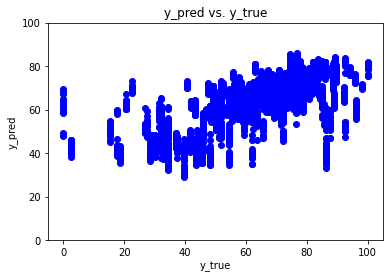

In [5]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

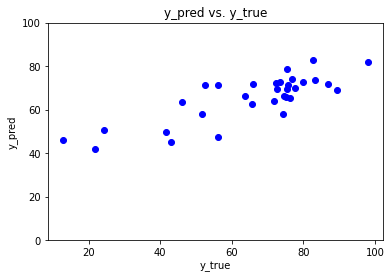

In [6]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_valid_predict,'Test Data':y_valid}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_test_set_RFR_opt.csv', index = False, header=True)

 1) Lipid                          0.164585
 2) Protein                        0.137782
 3) Lignin                         0.129505
 4) Ash                            0.125658
 5) Cellulose                      0.123468
 6) Carbohydrate                   0.103360
 7) Hemicellulose                  0.092471
 8) Toluene                        0.032332
 9) Dichloromethane                0.029596
10) Hexane                         0.020546
11) Acetone                        0.019466
12) Tetrahydrofuran                0.011071
13) Methanol                       0.004860
14) Diethyl Ether                  0.002849
15) Ethyl Acetate                  0.001388
16) Chloroform                     0.001063


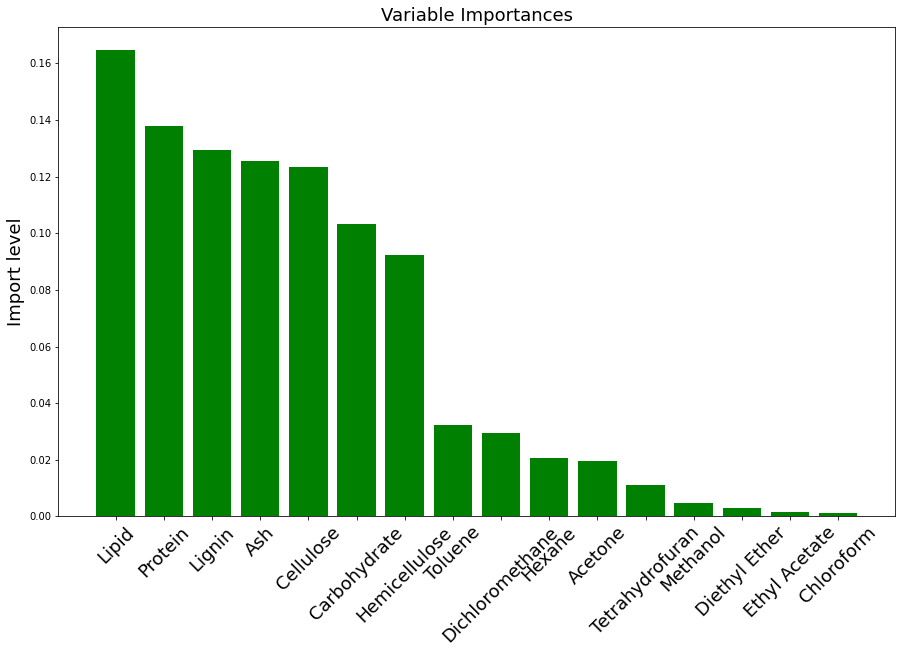

In [ ]:
import matplotlib.pyplot as plt

Features = Original_Features.drop('Group', axis=1)

Features.columns = ['Dichloromethane','Toluene','Acetone','Tetrahydrofuran','Methanol','Hexane','Diethyl Ether','Chloroform','Ethyl Acetate','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(15, 9))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('Biocrude Yield RF Variable Importances.png')